# Final Project
` - Group 2 Sep 8 2021`

## Title
- Boosting Algorithms for Phishing Websites Detection

## Team
- Jiaqi (Ricky) Gu
- Qi (Miracle) Shen
- Yakun (Alex) Zhang

## Summary
The project is about using Boosting Algorithms to detect phishing websites. <br> <br>
**Why Phishing Websites Detection?** <br>
Phishing websites nowadays are big threats to peolpe cyber privacy. <br> Therefore, compare and find a decent technique to detect these scams are vital. <br> <br>
**The audience of the report:** <br>
All internet users with basic networking and machine learning knowledge.<br> <br>
**The result of this project:** <br>
The result of this project is about finding out what types of boosting algorithm is more capable of do the detection. <br>
Developers with software engineering background can integrate the algorithm into a program. <br>
The program is supposed to study network users' browsing data and give phishing websites warning in the future. <br>

## Boosting Algorithms
- AdaBoost
- Gradient Boosting
- XG Boost

## Working Principle of Boosting Algorithms
    - Boosting is an ensamble meta-algorithm which aims to reduce bias and variance in supervised learning.
    - The boosting process combines weak learners into strong rules, namely, a strong learner.
    - The combination of weak learners is iterative, with latter classifiers focusing more on previous misclassifications.

## Dataset
- Kaggle Phishing Website Dataset

## Tryout
### Load Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading phishing website dataset
pwd = pd.read_csv('../Final Project/Data/phishing.csv')

# Checking data shape
row, col = pwd.shape
print(f"There are {row} rows and {col} columns")

# Data at a glance
print(pwd.head(10))

There are 11054 rows and 32 columns
   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   
5      5        1        0        -1        1              1             -1   
6      6        1        0         1        1              1             -1   
7      7        1        0        -1        1              1             -1   
8      8        1        1        -1        1              1             -1   
9      9        1        1         1        1              1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0 

## AdaBoost
    AdaBoost, short for Adaptive Boosting, is a satistical classification meta-algorithm.
    The algorithm can be less susceptible to overfitting issues than other classifiers.
    In this boosting technique, all weights are under reassignment.
    
    Reassignment of weights:
        Higher weights are given to misclassified instances.
        
    The algorithm keeps adding new learners to improve the classification.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set x, y, and splitted data
x = pwd.drop('class', axis=1)
y = pwd['class']

# Process the data
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model
classifier = AdaBoostClassifier()
classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [4]:
# Make predictions
y_pred = classifier.predict(x_test)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Evaluate the performance on training data
acc_train = accuracy_score(y_train, classifier.predict(x_train))
f1_train = f1_score(y_train, classifier.predict(x_train), average= 'weighted')

print("Training results")
print("Accuracy ->", acc_train)
print("F1 Score ->", f1_train)

Training results
Accuracy -> 0.938833378341885
F1 Score -> 0.9387371544262395


In [6]:
# Evaluate the performance on testing data
acc_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, average= 'weighted')

print("Test set results")
print("Accuracy ->",acc_test)
print("F1 Score ->",f1_test)

Test set results
Accuracy -> 0.9331140350877193
F1 Score -> 0.9329833163778688


In [7]:
# Used for pretty printing of confusion matrices

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    # Plot the confusion matrix
    # Normalization is applied
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalization = True")
    else:
        print('Normalization = False')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalization = False


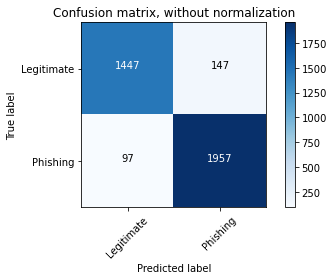

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cm, classes=['Legitimate', 'Phishing'], title='Confusion matrix, without normalization')
plt.show()

### Conclusion (AdaBoost)
According to the confusion matrix, there are (97+147) datapoints that are miss-classified. This leads to an overall testing accuracy: approx 93.31%. <br>
Given that both training and testing accuracy are relatively high, the classifier has a decent performance on detecting whether the datapoints inputted are from phishing websites or not.

## Gradient Boosting
    Gradient Boosting is a classification meta-algorithm.
    The algorthm involves sequentially training multiple models.
    For each of these new model, the model gradually minimizes the loss function using the Gradient Descent method.
    
    Gradient Descent
        This is a method which helps find a local minimum of differentiate functions (here is the loss function).

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
classifier_2 = GradientBoostingClassifier()
classifier_2.fit(x_train, y_train)

GradientBoostingClassifier()

In [10]:
# Make predictions
y_pred_2 = classifier_2.predict(x_test)

In [11]:
# Evaluate the performance on training data
acc_train_2 = accuracy_score(y_train, classifier_2.predict(x_train))
f1_train_2 = f1_score(y_train, classifier_2.predict(x_train), average= 'weighted')

print("Training results")
print("Accuracy ->", acc_train_2)
print("F1 Score ->", f1_train_2)

Training results
Accuracy -> 0.9530110721036997
F1 Score -> 0.9529710321809719


In [12]:
# Evaluate the performance on testing data
acc_test_2 = accuracy_score(y_test, y_pred_2)
f1_test_2 = f1_score(y_test, y_pred_2, average= 'weighted')

print("Test set results")
print("Accuracy ->",acc_test_2)
print("F1 Score ->",f1_test_2)

Test set results
Accuracy -> 0.9487390350877193
F1 Score -> 0.9486752024131005


Normalization = False


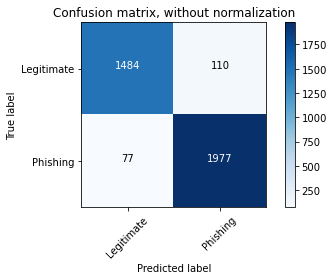

In [13]:
# Confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

plt.figure()
plot_confusion_matrix(cm_2, classes=['Legitimate', 'Phishing'], title='Confusion matrix, without normalization')
plt.show()

### Conclusion (Gradient Boosting)
According to the confusion matrix, there are (110+77) datapoints that are miss-classified. This leads to an overall testing accuracy: approx 94.87%. <br>
Given that both training and testing accuracy are higher than the ones from AdaBoost classifier, the classifier trained using Gradient Boosting perform better on detecting phishing websites on the provided dataset.

## XG Boost
    XG Boost, short for Extreme Gradient Boosting, the working principle is very similar to Gradient Boosting.
    
    One of the major differences is that XG Boost implement parallel processing when training models.
    This allows the algorithm to be run faster.
    
    Another main difference is that XG Boost improves its performance by applying various regularization techniques.
    The hyperparameters of XG Boost is more complex than the ones of Gradient Boosting.

In [14]:
from xgboost import XGBClassifier

# Train the model
classifier_1 = XGBClassifier()
classifier_1.fit(x_train, y_train)

C:\Users\ricka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# Make predictions
y_pred_1 = classifier_1.predict(x_test)

In [16]:
# Evaluate the performance on training data
acc_train_1 = accuracy_score(y_train, classifier_1.predict(x_train))
f1_train_1 = f1_score(y_train, classifier_1.predict(x_train), average= 'weighted')

print("Training results")
print("Accuracy ->", acc_train_1)
print("F1 Score ->", f1_train_1)

Training results
Accuracy -> 0.9974345125573859
F1 Score -> 0.9974344746481393


In [17]:
# Evaluate the performance on testing data
acc_test_1 = accuracy_score(y_test, y_pred_1)
f1_test_1 = f1_score(y_test, y_pred_1, average= 'weighted')

print("Test set results")
print("Accuracy ->",acc_test_1)
print("F1 Score ->",f1_test_1)

Test set results
Accuracy -> 0.9643640350877193
F1 Score -> 0.96434860977215


Normalization = False


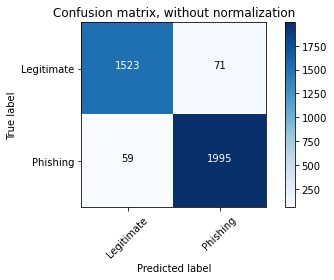

In [18]:
# Confusion matrix
cm_1 = confusion_matrix(y_test, y_pred_1)

plt.figure()
plot_confusion_matrix(cm_1, classes=['Legitimate', 'Phishing'], title='Confusion matrix, without normalization')
plt.show()

### Conclusion (XG Boost)
According to the confusion matrix, there are (71+59) datapoints that are miss-classified. This leads to an overall testing accuracy: approx 96.43%. <br>
Given that both training and testing accuracy are higher than the ones from the previous two classifiers, the classifier trained using XG Boost has the best performance so far on detecting phishing websites on the provided dataset.

## Final Results

                   Train Acc  Test Acc
Index Title                           
AdaBoost            0.938833  0.933114
Gradient Boosting   0.953011  0.948739
XG Boost            0.997435  0.964364


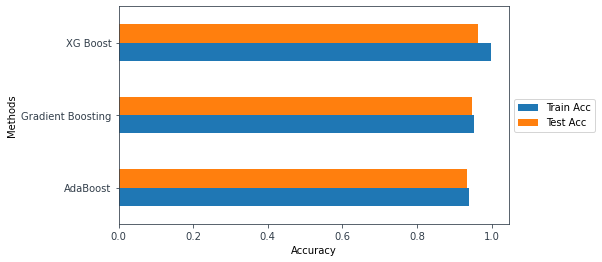

In [39]:
d = {'Index Title': ['AdaBoost', 'Gradient Boosting', 'XG Boost'], 'Train Acc': [acc_train, acc_train_2, acc_train_1], 
    'Test Acc': [acc_test, acc_test_2, acc_test_1]}

df = pd.DataFrame(d).set_index('Index Title')

print(df)

fig, ax = plt.subplots(figsize=(7,4))
df.plot(kind='barh', legend = True, ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Methods')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Evaluation
    Dataset is splitted into training and testing sets (.33:.67).
    Training set is used for building the models, 
    while testing set is used for evaluating the performance of the model.
    
    Among these three methods (AdaBoost, Gradient Boosting, XG Boost),
    the performances of Gradient Boosting and AdaBoost are close,
    while XG Boost dilvers the best predicting result.
    
    What is more, all three methods display no issue about overfitting.
    Since the training and testing accuracy are relatively balanced.

### Ethics
    The performance of the models depends on the features showcased by the dataset.
    In other words, dataset with richer features can help the models to make better predictions.